## Importing Libraries

In [1]:
# For data preprocessing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

# Saving the model
import pickle

In [2]:
!pip install xlrd

## Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train_final.csv')

In [5]:
train.isnull().sum()

,0
store_nbr,0
sales,0
onpromotion,0
cluster,0
dcoilwtico,0
year,0
day,0
month,0
week,0
day_of_week,0


In [6]:
train.columns

Index(['store_nbr', 'sales', 'onpromotion', 'cluster', 'dcoilwtico', 'year',
       'day', 'month', 'week', 'day_of_week', 'is_weekend', 'quarter',
       'season', 'Days_to_Thanksgiving', 'Days_to_Christmas', 'is_holiday',
       'price', 'log_sales', 'lag_1_log_sales', 'lag_7_log_sales',
       'lag_14_log_sales', 'lag_promo_1', 'rolling_promo_7',
       'rolling_7_log_sales', 'rolling_14_log_sales', 'family_0', 'family_1',
       'family_2', 'family_3', 'family_4', 'family_5', 'city_0', 'city_1',
       'city_2', 'city_3', 'city_4', 'holiday_type_0', 'holiday_type_1',
       'holiday_type_2', 'store_type_0', 'store_type_1', 'store_type_2'],
      dtype='object')

# Modeling

### Data Splitting

In [7]:
train_set = train.loc[train['year'].isin([2013, 2014, 2015, 2016])].copy()
eval_set = train.loc[train['year'] == 2017].copy()

In [8]:
train_set.shape

(284068, 42)

In [9]:
train_set.head()

,store_nbr,sales,onpromotion,cluster,dcoilwtico,year,day,month,week,day_of_week,...,city_1,city_2,city_3,city_4,holiday_type_0,holiday_type_1,holiday_type_2,store_type_0,store_type_1,store_type_2
0,25.0,0.000,0,1,93.14,2013,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1
1,25.0,180.589,0,1,93.14,2013,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1
2,25.0,0.000,0,1,93.14,2013,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1
3,25.0,810.000,0,1,93.14,2013,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1
4,25.0,2.000,0,1,93.14,2013,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1


In [10]:
eval_set.shape

(37132, 42)

In [11]:
eval_set.head()

,store_nbr,sales,onpromotion,cluster,dcoilwtico,year,day,month,week,day_of_week,...,city_1,city_2,city_3,city_4,holiday_type_0,holiday_type_1,holiday_type_2,store_type_0,store_type_1,store_type_2
284068,41.0,13.0,0,4,52.36,2017,2,1,1,0,...,0,0,1,0,0,1,1,0,0,1
284069,42.0,5.0,0,2,52.36,2017,2,1,1,0,...,0,1,1,1,0,1,1,0,0,1
284070,42.0,0.0,0,2,52.36,2017,2,1,1,0,...,0,1,1,1,0,1,1,0,0,1
284071,42.0,13.0,1,2,52.36,2017,2,1,1,0,...,0,1,1,1,0,1,1,0,0,1
284072,42.0,1975.0,1,2,52.36,2017,2,1,1,0,...,0,1,1,1,0,1,1,0,0,1


In [12]:
train_data = train_set[train_set['sales'] != -1].copy()
test_data = train_set[train_set['sales'] == -1].copy()

In [13]:
X_train = train_data.drop(['log_sales','sales'], axis=1, errors='ignore')
y_train = train_data['log_sales']

X_test = test_data.drop(['log_sales','sales'], axis=1, errors='ignore')
y_test = test_data['log_sales']

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

## Model 1. Linear Regression

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train2, y_train2)

lr_predictions = lr_model.predict(X_test2)

# Calculate metrics
lr_mse = mean_squared_error(y_test2, lr_predictions)
lr_mae = mean_absolute_error(y_test2, lr_predictions)

y_test2_abs = abs(y_test2)
lr_predictions_abs = abs(lr_predictions)

lr_rmsle = np.sqrt(mean_squared_log_error(y_test2_abs, lr_predictions_abs))
lr_rmse = np.sqrt(lr_mse)
lr_score = lr_model.score(X_test2, y_test2)

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({
    'Model': ['Linear Regression'],
    'RMSLE': [lr_rmsle],
    'RMSE': [lr_rmse],
    'MSE': [lr_mse],
    'MAE': [lr_mae],
    'Score': [lr_score]
}).round(2)

print(results_lr)

               Model  RMSLE  RMSE   MSE   MAE  Score
0  Linear Regression   0.65  1.88  3.54  1.57    0.5


## Model 2. Random Forest Regression

In [16]:
rf_model = RandomForestRegressor(n_estimators=25, max_depth=10, n_jobs=-1, random_state=7)
rf_model.fit(X_train2, y_train2)

rf_predictions = rf_model.predict(X_test2)

# Calculate metrics
rf_mse = mean_squared_error(y_test2, rf_predictions)
rf_mae = mean_absolute_error(y_test2, rf_predictions)

y_test2_abs = abs(y_test2)
rf_predictions_abs = abs(rf_predictions)

rf_rmsle = np.sqrt(mean_squared_log_error(y_test2_abs, rf_predictions_abs))
rf_rmse = np.sqrt(rf_mse)
rf_score = rf_model.score(X_test2, y_test2)

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'RMSLE': [rf_rmsle],
    'RMSE': [rf_rmse],
    'MSE': [rf_mse],
    'MAE': [rf_mae],
    'Score': [rf_score]
}).round(2)

print(results_rf)

           Model  RMSLE  RMSE   MSE   MAE  Score
0  Random Forest   0.26  0.64  0.42  0.43   0.94


## Model 3.Forecast Modelling (Light GBM)

In [17]:
pip install lightgbm

In [18]:
%matplotlib inline
import time
sns.set_style('whitegrid')

In [19]:
lgb_reg = LGBMRegressor(
    boosting_type='gbdt', num_leaves=52, max_depth=10, learning_rate=0.123,
    n_estimators=130, objective='regression', min_child_samples=20,
    subsample=0.78, subsample_freq=4, colsample_bytree=0.58,
    reg_alpha=10.0, reg_lambda=0.5, random_state=123
)
lgb_reg.fit(X_train2, y_train2)

prediction = lgb_reg.predict(X_test2)

# Calculate metrics
lgbm_mse = mean_squared_error(y_test2, prediction)
lgbm_mae = mean_absolute_error(y_test2, prediction)

y_test2_abs = abs(y_test2)
prediction_abs = abs(prediction)

lgbm_rmsle = np.sqrt(mean_squared_log_error(y_test2_abs, prediction_abs))
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_score = lgb_reg.score(X_test2, y_test2)

# Create a DataFrame to store results for LightGBM
results_lgbm = pd.DataFrame({
    'Model': ['LightGBM'],
    'RMSLE': [lgbm_rmsle],
    'RMSE': [lgbm_rmse],
    'MSE': [lgbm_mse],
    'MAE': [lgbm_mae],
    'Score': [lgbm_score]
}).round(2)

print(results_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.292158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 227254, number of used features: 38
[LightGBM] [Info] Start training from score 3.231060
      Model  RMSLE  RMSE   MSE   MAE  Score
0  LightGBM   0.25  0.57  0.32  0.42   0.95


## Model 4.Forecast Modelling (XGBoost)

In [20]:
!pip install xgboost

In [21]:
xgb_reg = XGBRegressor(
    random_state=123, n_estimators=100, gamma=24.47,
    subsample=0.75, learning_rate=0.1235, colsample_bytree=1,
    max_depth=10, min_child_weight=0.2150999, sub_sample=0.74,
    reg_lambda=0.8
)
xgb_reg.fit(X_train2, y_train2)

prediction = xgb_reg.predict(X_test2)

# Calculate metrics
xgb_mse = mean_squared_error(y_test2, prediction)
xgb_mae = mean_absolute_error(y_test2, prediction)

y_test2_abs = abs(y_test2)
prediction_abs = abs(prediction)

xgb_rmsle = np.sqrt(mean_squared_log_error(y_test2_abs, prediction_abs))
xgb_rmse = np.sqrt(xgb_mse)
xgb_score = xgb_reg.score(X_test2, y_test2)

# Create a DataFrame to store results for XGBoost
results_xgb = pd.DataFrame({
    'Model': ['XGBoost'],
    'RMSLE': [xgb_rmsle],
    'RMSE': [xgb_rmse],
    'MSE': [xgb_mse],
    'MAE': [xgb_mae],
    'Score': [xgb_score]
}).round(2)

print(results_xgb)

     Model  RMSLE  RMSE   MSE   MAE  Score
0  XGBoost   0.23  0.53  0.28  0.39   0.96


In [22]:
results_df = pd.concat([results_lr, results_rf, results_lgbm, results_xgb], ignore_index=True)

results_df = results_df.sort_values(by='RMSLE', ascending=True)

results_df = results_df.reset_index(drop=True)

print(results_df)

               Model  RMSLE  RMSE   MSE   MAE  Score
0            XGBoost   0.23  0.53  0.28  0.39   0.96
1           LightGBM   0.25  0.57  0.32  0.42   0.95
2      Random Forest   0.26  0.64  0.42  0.43   0.94
3  Linear Regression   0.65  1.88  3.54  1.57   0.50


##### . **RMSLE** is particularly useful when the target variable has a wide range of values. Lower RMSLE values indicate a better model fit.
##### . **RMSE** measures the magnitude of errors. Lower RMSE indicates better performance, especially when large errors are penalized.
##### . **MSE** is the squared error and indicates overall model accuracy. Lower MSE values are better.
##### . **MAE** measures the average error magnitude without considering direction. A lower MAE indicates better accuracy.


##### The RMSLE and RMSE represent the model's prediction error, with lower values indicating better performance. The MSE provides a measure of the squared error between predicted and actual values, while the MAE measures the average absolute difference between predictions and actuals.


##### - **Best Performing Models**: **XGBoost** and **Random Forest** perform the best in terms of all metrics (RMSLE, RMSE, MSE, and MAE). They have the lowest errors and highest scores.
#####  - **Other Notable Models**: **LightGBM** is also a strong contender, although it slightly lags behind XGBoost and Random Forest in terms of accuracy.
##### - **Models to Consider for Improvement**: **Linear Regression** shows relatively weaker performance, especially in comparison to tree-based models like XGBoost and Random Forest.

# Hyperparameter Tuning

In [23]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV with more iterations
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

best_xgb_model = random_search_xgb.best_estimator_
best_xgb_params = random_search_xgb.best_params_

best_xgb_predictions = best_xgb_model.predict(X_eval)

best_xgb_mse = mean_squared_error(y_eval, best_xgb_predictions)
best_xgb_rmse = np.sqrt(best_xgb_mse)
best_xgb_mae = mean_absolute_error(y_eval, best_xgb_predictions)
best_xgb_score = best_xgb_model.score(X_eval, y_eval)

abs_best_xgb_predictions = np.abs(best_xgb_predictions)
abs_y_eval = np.abs(y_eval)

best_xgb_rmsle = np.sqrt(mean_squared_log_error(abs_y_eval, abs_best_xgb_predictions))

best_results_xgb = pd.DataFrame({
    'Model': ['Best XGBoost'],
    'RMSLE': [best_xgb_rmsle],
    'RMSE': [best_xgb_rmse],
    'MSE': [best_xgb_mse],
    'MAE': [best_xgb_mae],
    'Score': [best_xgb_score]
}).round(2)

print(best_results_xgb)

          Model  RMSLE  RMSE  MSE   MAE  Score
0  Best XGBoost    0.2  0.44  0.2  0.31   0.97


In [24]:
print("\nBest Hyperparameters for XGBoost:", best_xgb_params)


Best Hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


### XGBoost Model Hyperparameter Tuning using Randomized Search

The **XGBoost** model was fine-tuned using a **randomized search** to identify the optimal combination of hyperparameters that would maximize its performance. The search led to the following best hyperparameters:

- **Number of Estimators (Trees)**: 200
- **Maximum Depth**: 9
- **Learning Rate**: 0.1
- **Subsample**: 0.8
- **Colsample Bytree**: 0.9

These hyperparameters represent the configuration that resulted in the best performance for the **XGBoost** model on the evaluation data. The selection of these values was based on their ability to minimize the **Mean Squared Error (MSE)**, a key indicator of predictive accuracy. By fine-tuning these hyperparameters, the model's generalization ability to unseen data has been notably improved.

After applying the optimal hyperparameters, the **XGBoost** model's performance on the evaluation dataset is as follows:

- **Root Mean Squared Logarithmic Error (RMSLE)**: 0.2
  The RMSLE decreased after tuning, indicating that the model has become better at handling variations in the target variable.

- **Root Mean Squared Error (RMSE)**: 0.44
  After tuning, the RMSE improved, reflecting that the model’s predictions are more accurate on average.

- **Mean Squared Error (MSE)**: 0.2
  The MSE decreased, signaling that the model's predictions are now closer to the true values on average.

- **Mean Absolute Error (MAE)**: 0.31  
  After tuning, the MAE reduced, suggesting that the model’s predictions are more precise compared to the actual values.

The hyperparameter tuning process resulted in improvements across all evaluation metrics, indicating that the model's performance has been significantly enhanced. This suggests that the tuned **XGBoost** model is a better fit for the dataset and provides more accurate predictions of the target variable. These metrics provide valuable insights into the model's accuracy and its ability to predict the target values reliably.

### Summary:
In summary, the **XGBoost** model, after optimizing the hyperparameters, shows a marked improvement in predictive performance compared to its initial configuration. It effectively captures the relationships between features and the target variable, resulting in more accurate predictions on the evaluation data.


# Residual Plot to evaluate model fit and detect patterns in forecast errors

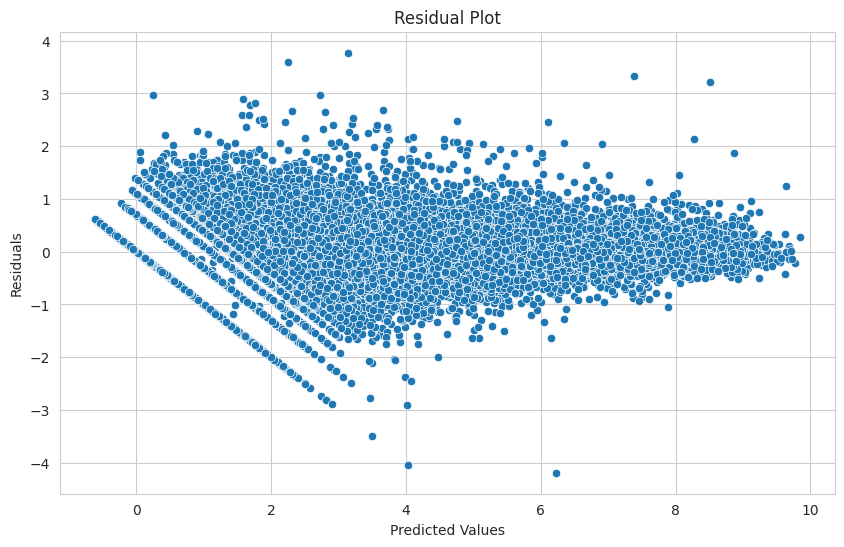

In [25]:
residuals = y_eval - best_xgb_predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_xgb_predictions, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Feature Importance

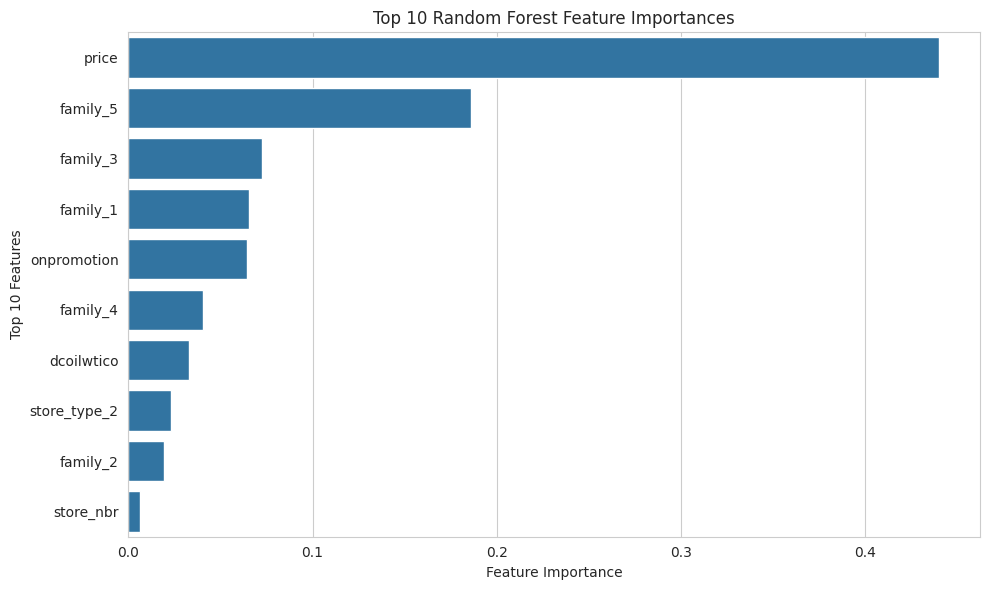

In [26]:
rf_model_fi = RandomForestRegressor(n_estimators=25, max_depth=10, n_jobs=-1, random_state=7)
rf_model_fi.fit(X_train, y_train)

feature_importances = pd.Series(rf_model_fi.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

top_10_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features, y=top_10_features.index)
plt.xlabel('Feature Importance')
plt.ylabel('Top 10 Features')
plt.title('Top 10 Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Actual vs Predicted

In [27]:
actual_sales = np.expm1(y_eval)
safe_predictions = np.clip(best_xgb_predictions, 0, None)
predicted_sales = np.expm1(safe_predictions)

actual_vs_predicted = pd.DataFrame({'Actual': actual_sales.astype(int), 'Predicted': predicted_sales.astype(int)})

print(actual_vs_predicted.head(20))

        Actual  Predicted
263205       0          0
48259        7          8
79321       61         96
9865         0          0
171679       5          2
87067     1407       1171
263711    1589       1713
58356        5          4
188112       7          3
200009       1          1
48262       44         36
11047        5          5
254859      26         22
147506     335        452
273749       1          1
52099        0          0
240482     114        188
34192      155        107
83154        0          0
219853      10          4


In [28]:
with open('/content/drive/MyDrive/favorita-grocery-sales-forecasting/xgboost_model.pkl', 'wb') as file:
   pickle.dump(best_xgb_model, file)

In [29]:
X_train.columns

Index(['store_nbr', 'onpromotion', 'cluster', 'dcoilwtico', 'year', 'day',
       'month', 'week', 'day_of_week', 'is_weekend', 'quarter', 'season',
       'Days_to_Thanksgiving', 'Days_to_Christmas', 'is_holiday', 'price',
       'lag_1_log_sales', 'lag_7_log_sales', 'lag_14_log_sales', 'lag_promo_1',
       'rolling_promo_7', 'rolling_7_log_sales', 'rolling_14_log_sales',
       'family_0', 'family_1', 'family_2', 'family_3', 'family_4', 'family_5',
       'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'holiday_type_0',
       'holiday_type_1', 'holiday_type_2', 'store_type_0', 'store_type_1',
       'store_type_2'],
      dtype='object')

# Prediction Function

In [30]:
def predict_sales(user_input, model, binary_encoder, model_features):
    user_input['date'] = pd.to_datetime(user_input['date'])
    if user_input['date'] < pd.to_datetime('2017-01-01'):
        raise ValueError("Date must be after 2017.")

    user_input_df = pd.DataFrame([user_input])

    user_input_df['day'] = user_input_df['date'].dt.day
    user_input_df['month'] = user_input_df['date'].dt.month
    user_input_df['week'] = user_input_df['date'].dt.isocalendar().week.astype(int)
    user_input_df['year'] = user_input_df['date'].dt.year
    user_input_df['day_of_week'] = user_input_df['date'].dt.dayofweek
    user_input_df['is_weekend'] = user_input_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    user_input_df['quarter'] = user_input_df['date'].dt.quarter
    user_input_df['season'] = user_input_df['month'].apply(
        lambda x: 0 if x in [2, 3] else 1 if x in [4, 5, 6] else 2 if x in [7, 8]
        else 3 if x in [9, 10, 11] else 4
    )

    user_input_df['Days_to_Thanksgiving'] = (
        pd.to_datetime(user_input_df["year"].astype(str) + "-11-24") - user_input_df["date"]
    ).dt.days.astype(int)
    user_input_df['Days_to_Christmas'] = (
        pd.to_datetime(user_input_df["year"].astype(str) + "-12-24") - user_input_df["date"]
    ).dt.days.astype(int)

    user_input_df['is_holiday'] = 0
    user_input_df['onpromotion'] = user_input.get('onpromotion', 0)
    user_input_df['price'] = user_input.get('current_price', 0)
    user_input_df['dcoilwtico'] = user_input.get('dcoilwtico', 0)
    user_input_df['store_nbr'] = user_input.get('store_nbr', 1)
    user_input_df['cluster'] = user_input.get('cluster', 3)

    for col in ['lag_1_log_sales', 'lag_7_log_sales', 'lag_14_log_sales',
                'lag_promo_1', 'rolling_promo_7', 'rolling_7_log_sales', 'rolling_14_log_sales']:
        user_input_df[col] = 0

    user_input_df['holiday_type'] = 'Work Day'

    categorical_cols = ['family', 'store_type', 'city', 'holiday_type']
    encoded_df = binary_encoder.transform(user_input_df[categorical_cols])
    user_input_df = pd.concat([user_input_df.drop(columns=categorical_cols), encoded_df], axis=1)

    for col in model_features:
        if col not in user_input_df:
            user_input_df[col] = 0

    user_input_df = user_input_df[model_features].astype(float)

    log_sales_pred = model.predict(user_input_df)[0]
    sales_pred = np.expm1(log_sales_pred)
    if sales_pred <= 0:
        sales_pred = 1

    return int(sales_pred)


In [31]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.8 MB/s eta 0:00:00


In [32]:
with open('/content/drive/MyDrive/favorita-grocery-sales-forecasting/xgboost_model.pkl', 'rb') as file:
    trained_model = pickle.load(file)

with open('/content/drive/MyDrive/favorita-grocery-sales-forecasting/binary_encoder.pkl', 'rb') as file:
    binary_encoder = pickle.load(file)

In [35]:
user_input = {
    'onpromotion': 0,
    'date': '2026-12-17',
    'dcoilwtico': 34,
    'family': 'PRODUCE',
    'city': 'Daule',
    'current_price': 12,
    'store_type': 'B'
}

predicted_sales = predict_sales(user_input, trained_model, binary_encoder, X_train.columns)
print(f"Predicted sales: {predicted_sales}")

Predicted sales: 21
